In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np
import cv2 as cv
import mediapipe as mp
import numpy as np
from keras.utils import to_categorical

Import the data and labels, then split into training and testing.

Note that there are many different files here, this is because I processed each video separately, then saved the data in individual files, I combine them all and shuffle them below. (Probably should improve this at some point).

In [3]:
X0 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data0.npy')
y0 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels0.npy')
X1 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data1.npy')
y1 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels1.npy')
X2 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data2.npy')
y2 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels2.npy')
X3 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data3.npy')
y3 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels3.npy')
X4 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data4.npy')
y4 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels4.npy')
X5 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data5.npy')
y5 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels5.npy')
X6 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data6.npy')
y6 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels6.npy')
X7 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data7.npy')
y7 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels7.npy')
X8 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data8.npy')
y8 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels8.npy')
X9 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Data9.npy')
y9 = np.load('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Training Data\\W=19, Mid Label\\Labels9.npy')

#now join all the data into two arrays, one for data (X), and the other for labels (y)
X = np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8), axis=0)
y = np.concatenate((y0,y1,y2,y3,y4,y5,y6,y7,y8), axis=0)

#Now shuffle all data and labels
perm = np.random.permutation(X.shape[0])
y = y[perm]
X = X[perm]
X.shape,y.shape

((2693, 19, 3), (2693, 3))

Now build the GRU model.

In [44]:
model_gru = Sequential()
model_gru.add(GRU(40, return_sequences=True))
model_gru.add(GRU(20,return_sequences=True))
model_gru.add(GRU(15))
model_gru.add(Dense(3, activation='softmax'))

Compile and train the model

In [45]:
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_gru.fit(X,y, epochs=100, batch_size=20)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5621 - loss: 0.8733
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8960 - loss: 0.2969
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9056 - loss: 0.2564
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9162 - loss: 0.2118
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9257 - loss: 0.2088
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9299 - loss: 0.1952
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9270 - loss: 0.1960
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9372 - loss: 0.1850
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9299 - loss: 0.1718
Epoch 10/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9282 - loss: 0.1717
Epoch 11/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9372 - loss: 0.1610
Epoch 12/100
135/135 ━━━━━━━━━━━━━━━━━━━━

In [46]:
#Save the model
model_gru.save("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Classification\\Models\\Not9.h5")

# Processing Unseen Video
Note that the processing below is not described very well, this is because it is an exact copy of the code from the file named "Data preparation" which is within the same folder as this document.

In [5]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions import detectPose, extract_angles, moving_average

In [6]:
path = "C:\\Users\\Cian\\OneDrive\\Documents\\Imperial\\Year 4\\FYP\\Local Download\\Technical\\Bicep Curl Analysis\\Classification\\Training Data (Videos)\\Detailed Exercise Classification\\Testing 3.mp4"
Angles = extract_angles(path)

C:\Users\Cian\Anaconda\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [7]:
window_size = 7
angles = np.copy(Angles)
angles[:,0], angles[:,1], angles[:,2] = moving_average(Angles[:,0], window_size), moving_average(Angles[:,1], window_size), moving_average(Angles[:,2], window_size)

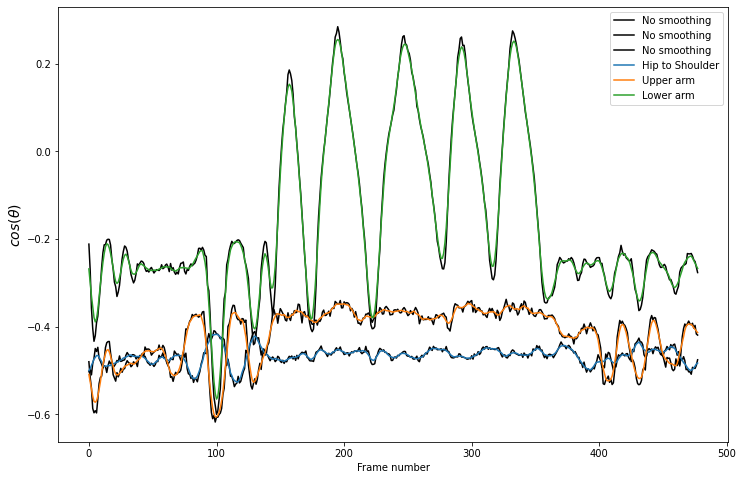

In [8]:
import matplotlib.pyplot as plt
o = np.arange(0,len(angles),1)
plt.figure(figsize=(12,8))
plt.plot(o,Angles[:,0],label='No smoothing',c='black')
plt.plot(o,Angles[:,1],label='No smoothing',c='black')
plt.plot(o,Angles[:,2],label='No smoothing',c='black')
plt.plot(o,angles[:,0],label='Hip to Shoulder')
plt.plot(o,angles[:,1], label='Upper arm')
plt.plot(o,angles[:,2], label = 'Lower arm')
plt.xlabel('Frame number')
plt.ylabel(r'$cos(\theta)$', fontsize = 14)
plt.legend()

In [9]:
dt = 1/15
X = 19
sequences = np.zeros((angles.shape[0]-X+1, X, 3))
for i in range(X,angles.shape[0]):
    sequences[i-X] = angles[i-X:i]

Make a prediction for every frame in the unseen video.

In [10]:
res = model_gru.predict(sequences)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Apply a logical rule to the output of the GRU model. The rule is as follows:
- Keep track of what the previous class chunk was, if the previous class was not “Concentric Contraction” then the current class cannot be “Eccentric Contraction”. In this situation, the class of choice will be replaced by “Not Curl”.

In [11]:
#First find the indexes that the class changes, this will allow me to find the class chunks (mentioned above)
choice = to_categorical(np.argmax(res,axis=1),3)
change = choice[1:]*choice[:-1]
C = np.where(np.sum((change == np.array([0,0,0])), axis=1) == 3)[0]
print(C)
class_chunk = [np.argmax(res[i]) for i in C-1]

#create a list that represents the previous class chunk corresponding to the current class chunk.
#Note that I add class 0 ("Not Curl") to the beginning since there is not an actual previous chunk
prev_chunk = [0]+class_chunk[:-1]

#Now change the choice vector based on the rule
for i in range(len(class_chunk)):
    if class_chunk[i] == 2 and prev_chunk[i] != 1:
        ind1 = C[i-1]+1
        ind2 = C[i]+1
        choice[ind1:ind2] = np.array([1,0,0])

[ 10  17  26  29  86  89 113 120 135 146 166 187 215 240 267 284 308 325
 353]


Apply a moving average to the results (reason is described in my log on page 12).

In [12]:
res_avg = np.copy(res)
Window_Size = 7
res_avg[:,0],res_avg[:,1],res_avg[:,2]= moving_average(res[:,0],Window_Size),moving_average(res[:,1],Window_Size),moving_average(res[:,2],Window_Size)

In [13]:
CHANGE = choice[1:]*choice[:-1]
c = (np.where(np.sum((CHANGE == np.array([0,0,0])), axis=1) == 3)[0]+9)*dt
c

array([ 9.6       , 10.33333333, 11.66666667, 13.06666667, 14.93333333,
       16.6       , 18.4       , 19.53333333, 21.13333333, 22.26666667,
       24.13333333])

Plot the probability of each class before and after the smoothing.

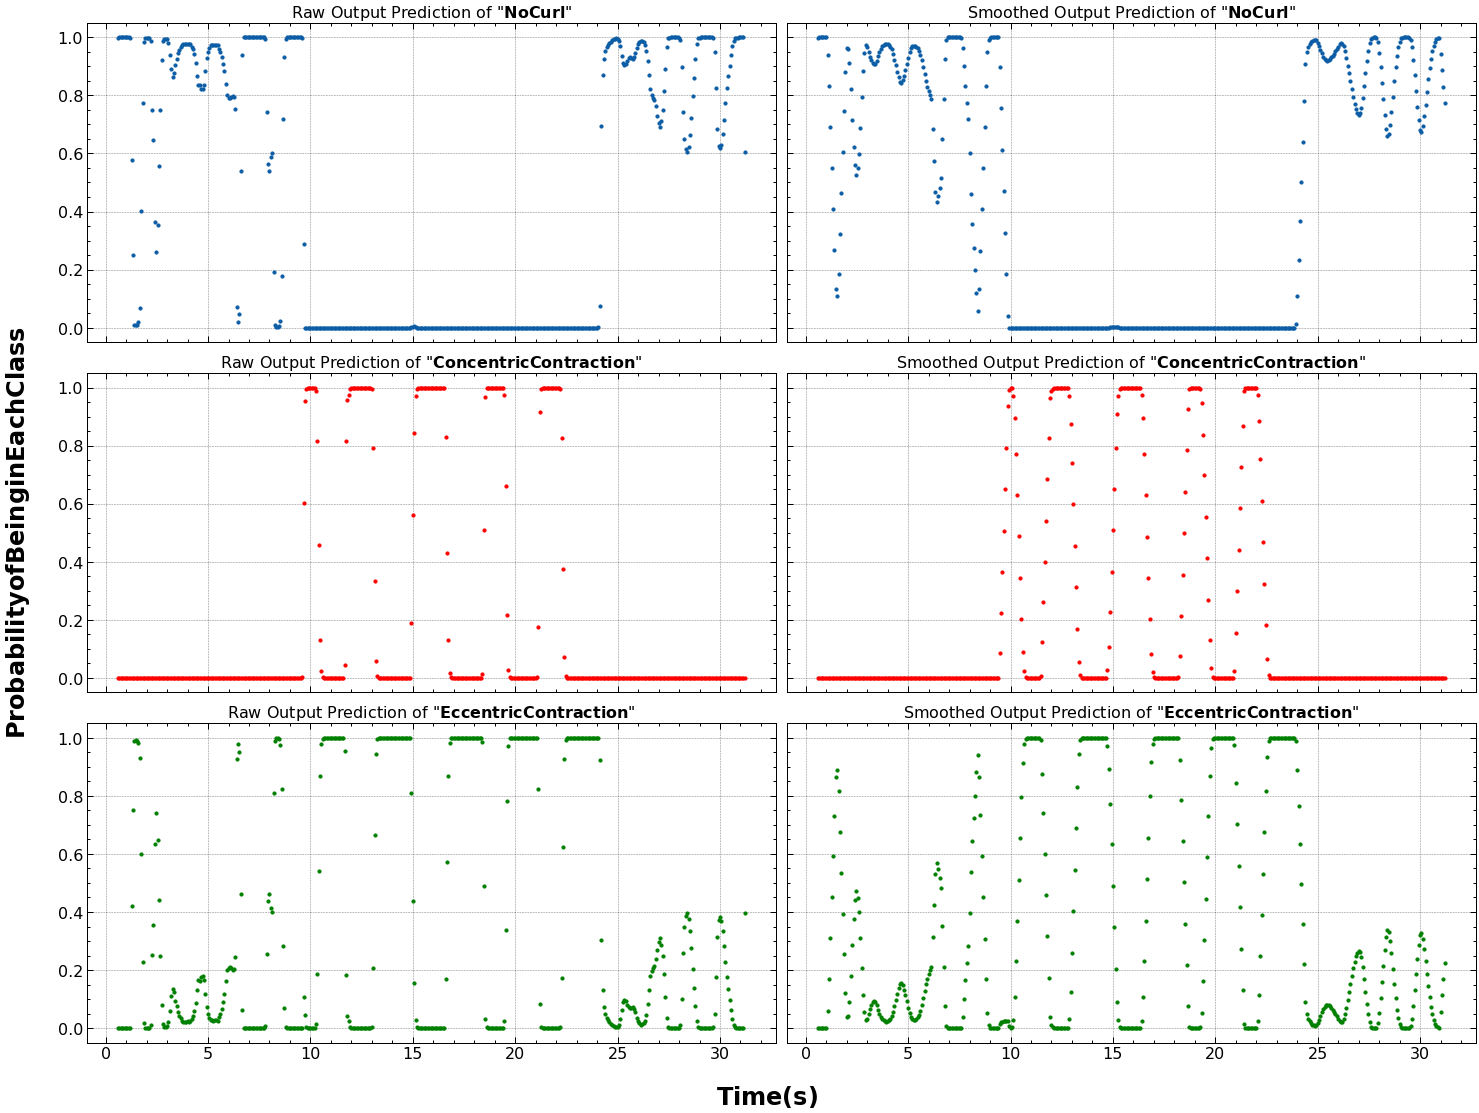

In [14]:
plt.style.use(['science', 'notebook', 'grid'])
t = (np.arange(0,len(res),1)+9)/15

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharey=True, sharex=True)
axs[0, 1].scatter(t, res_avg[:,0], s=10)
axs[0, 0].scatter(t, res[:,0], s=10)
axs[1, 1].scatter(t, res_avg[:,1], s=10,c='red')
axs[1, 0].scatter(t, res[:,1], s=10,c='red')
axs[2, 1].scatter(t, res_avg[:,2], s=10,c='green')
axs[2, 0].scatter(t, res[:,2], s=10,c='green')

axs[0,0].set_title(r'Raw Output Prediction of "$\bf{No Curl}$"')
axs[0,1].set_title(r'Smoothed Output Prediction of "$\bf{No Curl}$"')
axs[1,0].set_title(r'Raw Output Prediction of "$\bf{Concentric Contraction}$"')
axs[1,1].set_title(r'Smoothed Output Prediction of "$\bf{Concentric Contraction}$"')
axs[2,0].set_title(r'Raw Output Prediction of "$\bf{Eccentric Contraction}$"')
axs[2,1].set_title(r'Smoothed Output Prediction of "$\bf{Eccentric Contraction}$"')

fig.text(-0.03, 0.5, r'$\bf{Probability of Being in Each Class}$', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.03, r'$\bf{Time (s)}$', ha='center', fontsize=24)
plt.tight_layout()
plt.savefig('C:\\Users\\Cian\\Downloads\\FIG.png')

Now print the actual choice

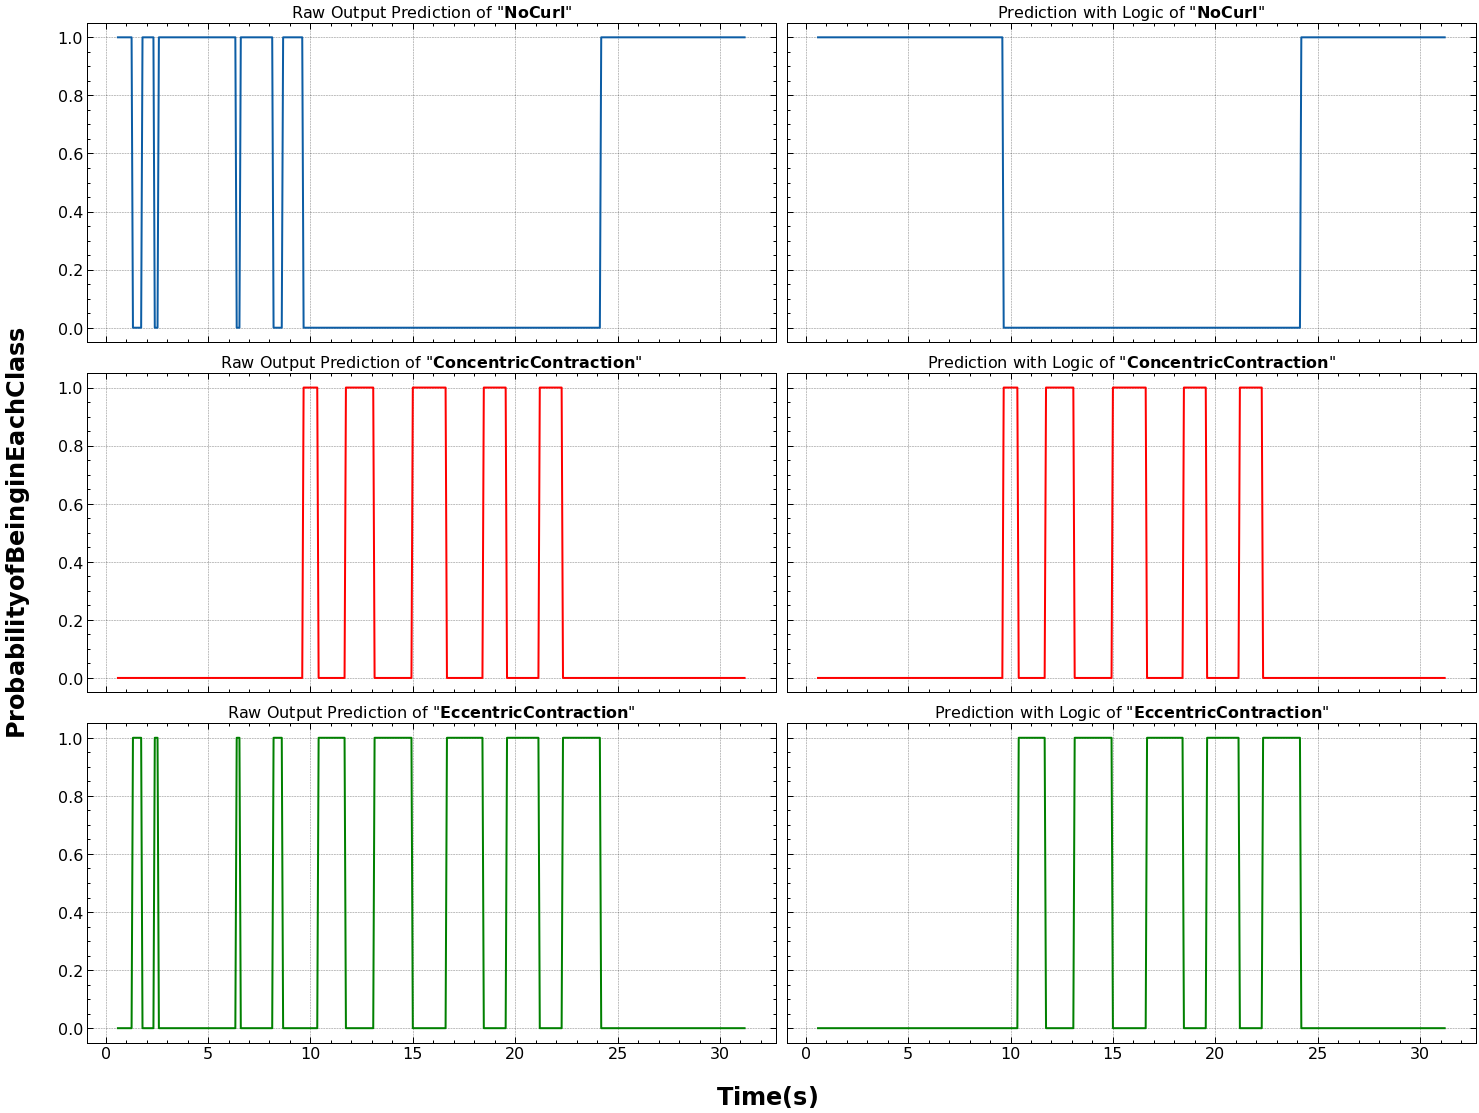

In [23]:
t = (np.arange(0,len(res),1)+9)/15
choice1 = to_categorical(np.argmax(res,axis=1),3)

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharey=True, sharex=True)
axs[0, 1].plot(t, choice[:,0])
axs[0, 0].plot(t, choice1[:,0])
axs[1, 1].plot(t, choice[:,1],c='red')
axs[1, 0].plot(t, choice1[:,1],c='red')
axs[2, 1].plot(t, choice[:,2],c='green')
axs[2, 0].plot(t, choice1[:,2],c='green')

axs[0,0].set_title(r'Raw Output Prediction of "$\bf{No Curl}$"')
axs[0,1].set_title(r'Prediction with Logic of "$\bf{No Curl}$"')
axs[1,0].set_title(r'Raw Output Prediction of "$\bf{Concentric Contraction}$"')
axs[1,1].set_title(r'Prediction with Logic of "$\bf{Concentric Contraction}$"')
axs[2,0].set_title(r'Raw Output Prediction of "$\bf{Eccentric Contraction}$"')
axs[2,1].set_title(r'Prediction with Logic of "$\bf{Eccentric Contraction}$"')

fig.text(-0.03, 0.5, r'$\bf{Probability of Being in Each Class}$', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.03, r'$\bf{Time (s)}$', ha='center', fontsize=24)
plt.tight_layout()
plt.savefig('C:\\Users\\Cian\\Downloads\\FIG.png')